# **PREDICTIVE MODELING (TIME SERIES FORECASTING)**

"Strategic Analysis of Real Estate Markets: Leveraging Zillow Research Data for Optimal Zip Code Investments"

## **Contributors:**
   - Victorine Imbuhila
   - Titus Mutuku 
   - Mary Gaceri
   - Sammy Kimani
   - Winnie Mauti 
   - Mwenda James

------------------------------------**PROJECT SETUP**------------------------------------

In [1]:
#Importing necessary Packages
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
%matplotlib inline
import joblib




# **1.BUSINESS UNDERSTANDING**

## **Overview**

Real estate encompasses land, buildings, and physical properties, with applications in residential, commercial, industrial, and agricultural sectors. It plays a pivotal role in the global economy, contributing significantly to the Gross Domestic Product (GDP).

**Real Estate in the USA:** With a population exceeding 330 million, the US real estate industry holds substantial economic importance, constituting around 6% of the GDP. The sector includes residential and commercial real estate, real estate development, property management, and real estate investment trusts (REITs).

This time series forecasting project is tailored to meet the specific needs of **Zamara real estate investment firm**. The **primary objective** is to empower your investment decisions by predicting future trends in real estate prices across various zip codes.

**Challenges in Real Estate Investment:** Numerous factors impact the real estate market, such as government policies, demographics, affordability, housing access disparities, location, and economic conditions. We as consultants aim to address these challenges by developing a predictive time series model to identify the top five zip codes for investment.

## **Problem Statement**
Real estate, a major component of individuals' wealth, faces complexities driven by various variables. We seek to streamline investment decisions by creating a predictive time series model. **The primary goal is to recommend the top five zip codes for investment, considering 
the location.

## **Objectives**

**Main Objective:** 
- Develop a time series model predicting the top five zip codes for real estate investment.

**Specific Objectives:**

- Evaluate which county exhibits the most promising real estate investment opportunities
- Understand the trend for the 5 best Zipcodes to invest in based on ROI 
- Forecast property values over the short and long term, aiming to identify the most favourable zip codes for investment across various counties

**Metric of Success**
The model's success will be measured by achieving a Root Mean Squared Error (RMSE) of less than 5%, coupled with the identification of the zip codes yielding the highest Return on Investment (ROI).

_________________________________

# **2.DATA AQUISITION AND UNDERSTANDING**

In [2]:
#Loading our dataset
df = pd.read_csv('data/zillow_data.csv')

In [3]:
#Observing what our dataset looks like
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


This Dataset obtained from Zillow website comprises of 14723 rows and 272 columns in Wide Format.

The dataset provides detailed real estate data, with each row representing a unique zip code. Here's an overview of the dataset structure:

- RegionID: A unique identifier for each region.
- RegionName: The zip code for the region.
- City: The city where the region is located.
- State: The state where the region is located.
- Metro: The metropolitan area associated with the region.
- CountyName: The name of the county where the region is located.
- SizeRank: A ranking of the region based on size.
- Monthly Price Data: Starting from April 1996 to April 2018, this dataset includes monthly real estate prices for each zip code.

In [4]:


def get_data_understanding(dataframe):
    """
    Returns separate DataFrames containing basic information about the provided DataFrame.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        tuple: A tuple of DataFrames containing different summaries.
    """
    # Basic information about the DataFrame
    info_df = pd.DataFrame({
        'Column': dataframe.columns,
        'Non-Null Count': dataframe.count(),
        'Dtype': dataframe.dtypes,
    })

    # Descriptive statistics for numeric columns
    numeric_cols = dataframe.select_dtypes(include=['number'])
    description_df = numeric_cols.describe()

    # Shape of the DataFrame
    shape_df = pd.DataFrame({
        'Aspect': ['Number of Rows', 'Number of Columns'],
        'Value': [dataframe.shape[0], dataframe.shape[1]],
    })

    # Missing values in each column
    missing_values_df = pd.DataFrame({
        'Column': dataframe.columns,
        'Missing Values': dataframe.isnull().sum(),
    })

    return info_df, description_df, shape_df, missing_values_df


info_df, description_df, shape_df, missing_values_df = get_data_understanding(df)

# Display the results
info_df.head(10)


,Column,Non-Null Count,Dtype
RegionID,RegionID,14723,int64
RegionName,RegionName,14723,int64
City,City,14723,object
State,State,14723,object
Metro,Metro,13680,object
CountyName,CountyName,14723,object
SizeRank,SizeRank,14723,int64
1996-04,1996-04,13684,float64
1996-05,1996-05,13684,float64
1996-06,1996-06,13684,float64


In [5]:
description_df.T

,count,mean,std,min,25%,50%,75%,max
RegionID,14723.0,81075.010052,31934.118525,58196.0,67174.5,78007.0,90920.5,753844.0
RegionName,14723.0,48222.348706,29359.325439,1001.0,22101.5,46106.0,75205.5,99901.0
SizeRank,14723.0,7362.000000,4250.308342,1.0,3681.5,7362.0,11042.5,14723.0
1996-04,13684.0,118299.123063,86002.509608,11300.0,68800.0,99500.0,143200.0,3676700.0
1996-05,13684.0,118419.044139,86155.673905,11500.0,68900.0,99500.0,143300.0,3704200.0
...,...,...,...,...,...,...,...,...
2017-12,14723.0,281095.320247,367045.388033,14300.0,129900.0,193400.0,313400.0,18307100.0
2018-01,14723.0,282657.060382,369572.741938,14100.0,130600.0,194100.0,315100.0,18365900.0
2018-02,14723.0,284368.688447,371773.905107,13900.0,131050.0,195000.0,316850.0,18530400.0
2018-03,14723.0,286511.376757,372461.234695,13800.0,131950.0,196700.0,318850.0,18337700.0


In [6]:
shape_df 

,Aspect,Value
0,Number of Rows,14723
1,Number of Columns,272


In [7]:
missing_values_df.head(10)

,Column,Missing Values
RegionID,RegionID,0
RegionName,RegionName,0
City,City,0
State,State,0
Metro,Metro,1043
CountyName,CountyName,0
SizeRank,SizeRank,0
1996-04,1996-04,1039
1996-05,1996-05,1039
1996-06,1996-06,1039


## **WRANGLING**

In [8]:


def reshape_data_to_long_format(dataframe):
    """
    Reshape the DataFrame from wide to long format.

    Args:
        dataframe (pandas.DataFrame): The wide-format DataFrame to reshape.

    Returns:
        pandas.DataFrame: The DataFrame in long format.
    """
    # Melting the DataFrame to long format
    melted_df = pd.melt(
        dataframe,
        id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'],
        var_name='Date',
        value_name='Price'
    )

    # Renaming 'RegionName' to 'Zipcode'
    melted_df = melted_df.rename(columns={'RegionName': 'Zipcode'})

    # Converting the 'Date' column to datetime format
    melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%Y-%m')

    # Sorting by 'Date'
    melted_df = melted_df.sort_values(by=['Date'])

    return melted_df

# Example usage with your DataFrame, zillow_data
data = reshape_data_to_long_format(df)

# Display the resulting DataFrame
data.head()


,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
9809,63186,13624,Clayton,NY,Watertown,Jefferson,9810,1996-04-01,56400.0
9810,77596,45335,Jamestown,OH,Dayton,Greene,9811,1996-04-01,NaN
9811,60795,7755,Ocean,NJ,New York,Monmouth,9812,1996-04-01,163700.0
9812,74415,37681,Limestone,TN,Johnson City,Washington,9813,1996-04-01,47200.0


In [9]:
def slice_recent_years(dataframe, date_column, years=10):
    """
    Slices the DataFrame to include only data from the most recent specified number of years.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to slice.
        date_column (str): The name of the column containing date information.
        years (int, optional): The number of years to include. Defaults to 10.

    Returns:
        pandas.DataFrame: A sliced DataFrame containing only the most recent specified years of data.
    """
    # Ensure the date column is in datetime format
    dataframe[date_column] = pd.to_datetime(dataframe[date_column])

    # Calculate the cutoff date
    cutoff_date = dataframe[date_column].max() - pd.DateOffset(years=years)

    # Slice the DataFrame
    recent_data = dataframe[dataframe[date_column] > cutoff_date].copy()

    return recent_data

# Example usage
recent_data = slice_recent_years(data, 'Date')

# Display the resulting DataFrame
recent_data

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
2144652,66934,21632,Federalsburg,MD,NaN,Caroline,9818,2008-05-01,160500.0
2144651,65347,18072,Pen Argyl,PA,Allentown,Northampton,9817,2008-05-01,187500.0
2144650,88599,70446,Loranger,LA,Hammond,Tangipahoa,9816,2008-05-01,124500.0
2144649,85288,62049,Hillsboro,IL,NaN,Montgomery,9815,2008-05-01,59900.0
2144643,58299,1226,Dalton,MA,Pittsfield,Berkshire,9809,2008-05-01,183100.0
...,...,...,...,...,...,...,...,...,...
3891783,67309,22556,Stafford,VA,Washington,Stafford,4912,2018-04-01,332700.0
3891784,72802,33761,Clearwater,FL,Tampa,Pinellas,4913,2018-04-01,334500.0
3891785,74730,38242,Paris,TN,Paris,Henry,4914,2018-04-01,90900.0
3891787,88803,70785,Walker,LA,Baton Rouge,Livingston,4916,2018-04-01,158400.0


### **Why slice our data ?**

- **Relevance of Recent Data:** The most recent data is often the most relevant in time series analysis, especially in dynamic markets like real estate. This is because it reflects the current trends and market conditions more accurately.

- **Changes in Market Dynamics:** Markets evolve, and factors influencing prices a decade ago may no longer be relevant. By focusing on the last 10 years, we can analyze data that is more representative of current market forces.

- **Computational Efficiency:** Limiting the dataset to a recent timeframe can reduce computational load, making analysis and forecasting more efficient, especially with large datasets.

- **Minimizing the Impact of Historical Anomalies:** Older data might include anomalies or unique events that are no longer relevant and could skew the analysis.

- **Consistency with Industry Standards:** In many analytical practices, including real estate forecasting, a 10-year period is often considered a standard measure for assessing recent trends and making projections.

### **Next Step**

- we will calculate the ROI of each county to determine which is the county with the Highest ROI to invest in 

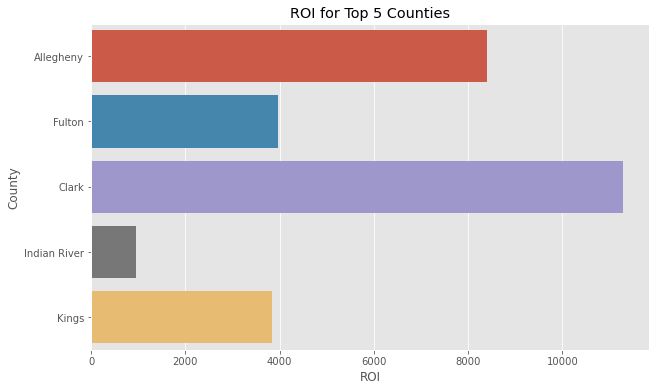

In [10]:

import seaborn as sns

def calculate_and_plot_roi(dataframe, price_column, county_column):
    """
    Calculate the ROI for each county, add it to the DataFrame, and plot the top 5 counties.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to process.
        price_column (str): The name of the column containing price information.
        county_column (str): The name of the column containing county information.

    Returns:
        pandas.DataFrame: A DataFrame containing the top 5 counties based on ROI.
    """
    # Calculate ROI for each county
    roi_df = dataframe.groupby(county_column).apply(
        lambda x: (x[price_column].iloc[-1] - x[price_column].iloc[0]) / x[price_column].iloc[0]
    ).reset_index(name='ROI')

    # Merge the ROI back into the original dataframe
    merged_df = pd.merge(dataframe, roi_df, on=county_column)

    # Get the top 5 counties by ROI
    top_counties = roi_df.nlargest(5, 'ROI')[county_column]

    # Filter the merged DataFrame for only top counties
    top_counties_data = merged_df[merged_df[county_column].isin(top_counties)]

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='ROI', y=county_column, data=top_counties_data, estimator=len)
    plt.title('ROI for Top 5 Counties')
    plt.xlabel('ROI')
    plt.ylabel('County')
    plt.show()

    return top_counties_data


top_counties_data = calculate_and_plot_roi(recent_data, 'Price', 'CountyName')


### **Observations**

- The plot reveals that Clark County has the highest ROI, followed by , Allegheny,Fulton, Kings, and Indian River in descending order. This means that Clark County is the most profitable county to invest in, while Indian River is the least profitable or the most loss-making county.

- The plot also shows the difference in ROI among the counties. For example, Clark County’s ROI is almost twice as much as Fulton County’s ROI, and more than four times as much as Kings County’s ROI. This indicates that there is a large variation in the profitability of the counties, and that some counties are much more attractive for investment than others.

In [11]:
# Count of missing values in each column of Clark County data
missing_values = recent_data.isnull().sum()

# Display the count of missing values
print("Missing Values in recent years:")
print(missing_values)


Missing Values in recent years:
RegionID           0
Zipcode            0
City               0
State              0
Metro         125160
CountyName         0
SizeRank           0
Date               0
Price          23838
dtype: int64


## **Handling Mising Values**

In [12]:
# filling missing values
recent_data['Metro'].fillna('Missing', inplace = True)

# Handling missing values in the 'Price' column
# We'll use linear interpolation as it's a common method for time-series data
recent_data['Price'] = recent_data['Price'].interpolate(
    method='linear')

### **Rationale:**

**Metro column**
- **Reason for Missing Values:** The missing values in the 'Metro' column may occur because some properties do not belong to any specific metropolitan area or the information was not provided.
- **Filling with 'Missing':** Filling the missing values with the string 'Missing' is a reasonable approach in this case. It provides valuable information that the 'Metro' data is not available for these records.
- **Preserving Information:** Instead of completely discarding rows with missing 'Metro' values, this approach retains these records and allows you to distinguish them as a separate category. 

**Price column**
- **Reason for Missing Values:** Missing values in the 'Price' column could occur for various reasons, such as data collection errors or gaps in the dataset.
- **Interpolation:** Linear interpolation is chosen because this dataset involves time-series data where values are expected to follow a continuous trend over time.
- ***Preserving Data Structure:** Linear interpolation helps in maintaining the temporal relationship between data points. It estimates missing values based on the trend observed in adjacent data points.
- **Common Approach:** Linear interpolation is a common method for handling missing values in time-series data because it provides a reasonable estimate of the missing values by assuming a linear relationship between adjacent data points.
- **Improved Data Completeness:** Filling missing 'Price' values allows you to use the data for analysis without gaps, improving the completeness of your time-series dataset

## **Effective Exploratory Data Analysis for Time series data** 

### **1.Trend Analysis**

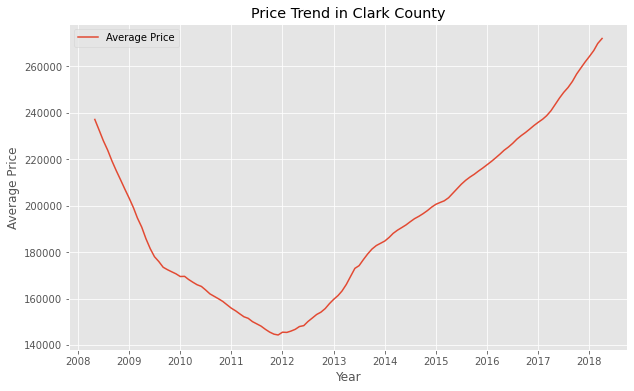

In [13]:


def plot_clark_county_trend(df):
    """
    Plots the average price trend for properties in Clark County.

    Args:
    df (pandas.DataFrame): The DataFrame containing the real estate data.
    """
    # Filter the DataFrame for Clark County
    clark_county_data = df[df['CountyName'] == 'Clark']

    # Group by date and calculate average price
    price_trend = clark_county_data.groupby('Date')['Price'].mean()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(price_trend, label='Average Price')
    plt.title('Price Trend in Clark County')
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_clark_county_trend(recent_data)



### **Observations**

- The line plot shows the average price trend in Clark County from 2008 to 2018. The trend is negative from 2008 to 2012, and positive from 2012 to 2018. This means that the average price decreased in the first period, and increased in the second period.

- The trend can be described by a piecewise linear function, which is a function that consists of two or more linear segments

- The average price in Clark County was affected by the global financial crisis of 2008-2009, which caused a severe drop in the housing market.

- The average price reached its lowest point in 2012, which could have been a good opportunity for buyers to enter the market at a bargain price.
- The average price recovered from the crisis and experienced a strong growth from 2012 to 2018, which could have been a result of increased demand, improved economic conditions, and limited supply.
- The average price in 2018 was almost the same as in 2008, which means that the market has returned to its pre-crisis level after a decade of volatility.

- The slope can also be used to compare the different segments of the line plot. For example, we can see that the slope of the second segment is positive and higher than the slope of the first segment, which means that the average price increased faster in the second period than it decreased in the first period. This indicates that the market recovered quickly from the crisis and surpassed its previous level.

### **Top 5 zipcodes within clark County**

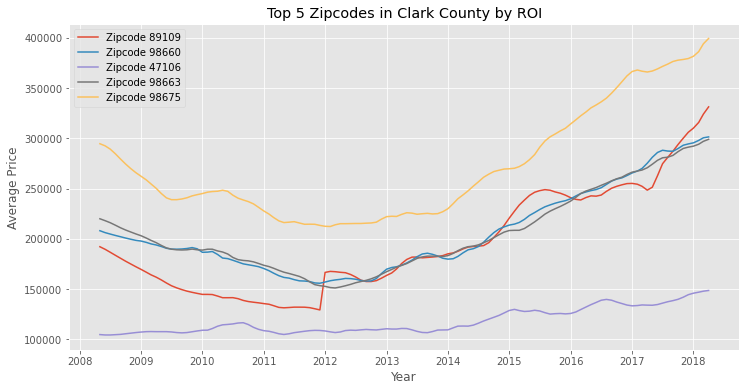

,Zipcode,City,ROI
40,89109,Las Vegas,72.507160
81,98660,Vancouver,44.903846
9,47106,Borden,41.969407
84,98663,Vancouver,35.970896
88,98675,Yacolt,35.573659


In [14]:


def top_roi_zipcodes_in_clark(df):
    """
    Calculates ROI for each zipcode in Clark County, 
    returns top five zipcodes with highest ROI, and plots their trends.

    Args:
    df (pandas.DataFrame): The DataFrame containing real estate data.

    Returns:
    pandas.DataFrame: A DataFrame with top 5 zipcodes and corresponding cities in Clark County based on ROI.
    """
    # Filter data for Clark County
    clark_df = df[df['CountyName'] == 'Clark']

    # Calculate ROI for each zipcode
    roi_df = clark_df.groupby(['Zipcode', 'City']).apply(lambda x: (x['Price'].iloc[-1] - x['Price'].iloc[0]) / x['Price'].iloc[0] * 100)
    roi_df = roi_df.reset_index().rename(columns={0: 'ROI'})

    # Sort by ROI and get top 5
    top_zipcodes = roi_df.sort_values(by='ROI', ascending=False).head(5)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    for zipcode in top_zipcodes['Zipcode']:
        zipcode_data = clark_df[clark_df['Zipcode'] == zipcode]
        ax.plot(zipcode_data['Date'].to_numpy(), zipcode_data['Price'].to_numpy(), label=f'Zipcode {zipcode}')


    ax.set_title('Top 5 Zipcodes in Clark County by ROI')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')
    ax.legend()
    plt.grid(True)
    plt.show()

    return top_zipcodes

# Call the function with your DataFrame
top_zipcodes_df = top_roi_zipcodes_in_clark(recent_data)
top_zipcodes_df


## **Observations**

The results show the average price trends for properties in five different zip codes in Clark County from 2008 to 2018, ranked by ROI (Return on Investment). 

**Interpretations:**

- **Zip code 89109 (Las Vegas) has the highest ROI of 72.51%**. It also shows a significant increase in average property prices over the years, especially from 2016 onwards. This suggests that Las Vegas is a very attractive and lucrative market for real estate investment, as the property value has grown rapidly and substantially.

- **Zip code 98660 (Vancouver) has an ROI of 44.90%.** The average property prices have been steadily increasing since around 2012. This indicates that Vancouver is a stable and profitable market for real estate investment, as the property value has increased consistently and moderately.

- **Zip code 47106 (Borden) with an ROI of 41.97%** shows a consistent increase in property prices but at a slower pace compared to Las Vegas and Vancouver. This implies that Borden is a reliable and decent market for real estate investment, as the property value has increased gradually and slightly.

- **Zip code 98663 (Vancouver) has an ROI of 35.97%**. The trend is similar to that of Borden but with a slightly lower rate of increase. This means that Vancouver is a dependable and fair market for real estate investment, as the property value has increased similarly and marginally.

- **Zip code 98675 (Yacolt) has the lowest ROI among these five at 35.57%**, and its price trend is relatively stable with a moderate increase. This reveals that Yacolt is a secure and modest market for real estate investment, as the property value has increased steadily and mildly.

## ***Checking for stationarity***

In time series modeling, it's commonly assumed that the data exhibits stationarity. This means that the statistical properties such as mean, variance, and autocorrelation of the series remain constant over time. Stationary data simplifies the modeling process significantly.

To verify if the time series data is stationary, techniques like the Dickey-Fuller test can be employed along with examining the rolling mean.

If the data turns out to be non-stationary, a method known as differencing can be applied. Differencing helps in transforming the data into a stationary form, which is more conducive for time series modeling.

In [15]:
processed_data = recent_data

In [16]:
processed_data

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
2144652,66934,21632,Federalsburg,MD,Missing,Caroline,9818,2008-05-01,160500.0
2144651,65347,18072,Pen Argyl,PA,Allentown,Northampton,9817,2008-05-01,187500.0
2144650,88599,70446,Loranger,LA,Hammond,Tangipahoa,9816,2008-05-01,124500.0
2144649,85288,62049,Hillsboro,IL,Missing,Montgomery,9815,2008-05-01,59900.0
2144643,58299,1226,Dalton,MA,Pittsfield,Berkshire,9809,2008-05-01,183100.0
...,...,...,...,...,...,...,...,...,...
3891783,67309,22556,Stafford,VA,Washington,Stafford,4912,2018-04-01,332700.0
3891784,72802,33761,Clearwater,FL,Tampa,Pinellas,4913,2018-04-01,334500.0
3891785,74730,38242,Paris,TN,Paris,Henry,4914,2018-04-01,90900.0
3891787,88803,70785,Walker,LA,Baton Rouge,Livingston,4916,2018-04-01,158400.0


In [17]:
import pandas as pd

def time_series_indexing(dataframe, date_column='Date', value_column='Price', additional_columns=None):
    """
    Function to perform time series indexing on a DataFrame, calculate monthly ROI, 
    and perform forward fill on missing ROI values.

    Args:
    dataframe (pd.DataFrame): The DataFrame to be processed.
    date_column (str): The name of the column containing date information.
    value_column (str): The name of the column containing the values for time series.
    additional_columns (list of str): List of other column names to be included in the index. Defaults to None.

    Returns:
    pd.DataFrame: A DataFrame indexed by the date with columns as specified, including MonthlyROI.
    """

    # Ensure the date column is set as the DataFrame index
    if dataframe.index.name != date_column:
        dataframe.set_index(date_column, inplace=True)

    # Calculate monthly ROI and forward fill missing values
    dataframe['MonthlyROI'] = dataframe[value_column].pct_change().ffill()

    # Select the required columns
    columns_to_keep = [value_column, 'MonthlyROI']
    if additional_columns:
        columns_to_keep.extend(additional_columns)

    # Create a DataFrame with only the required columns
    indexed_dataframe = dataframe[columns_to_keep]

    return indexed_dataframe

# Example usage
processed_data = processed_data 
indexed_data = time_series_indexing(processed_data, value_column='Price', additional_columns=['Zipcode','CountyName'])
indexed_data


,Price,MonthlyROI,Zipcode,CountyName
Date,,,,
2008-05-01,160500.0,NaN,21632,Caroline
2008-05-01,187500.0,0.168224,18072,Northampton
2008-05-01,124500.0,-0.336000,70446,Tangipahoa
2008-05-01,59900.0,-0.518876,62049,Montgomery
2008-05-01,183100.0,2.056761,1226,Berkshire
...,...,...,...,...
2018-04-01,332700.0,0.895726,22556,Stafford
2018-04-01,334500.0,0.005410,33761,Pinellas
2018-04-01,90900.0,-0.728251,38242,Henry


Processing zipcode: 89109
Processing zipcode: 98660
Processing zipcode: 47106
Processing zipcode: 98663
Processing zipcode: 98675
Columns in top_zipcodes_df: Index(['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'Price', 'MonthlyROI'],
      dtype='object')


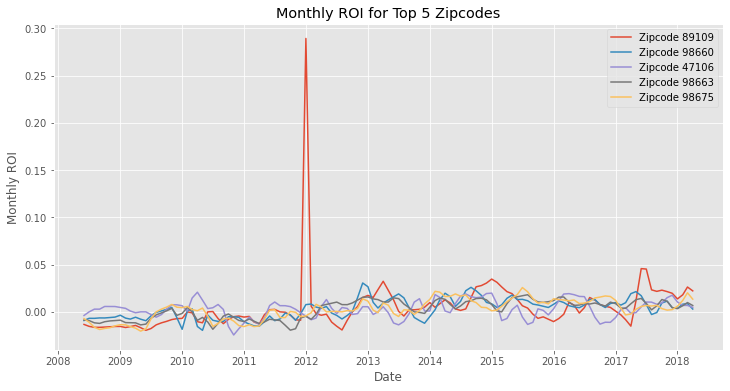

In [18]:


class ROICalculator:
    def __init__(self, df, zipcode):
        self.df = df[df['Zipcode'] == zipcode].copy()  # Create a copy of the slice

    def calculate_monthly_roi(self):
        self.df['MonthlyROI'] = self.df['Price'].pct_change()
        return self.df

def get_top_zipcodes_data(df, zipcodes):
    top_zipcodes_df = pd.DataFrame()
    for zipcode in zipcodes:
        print(f"Processing zipcode: {zipcode}")  
        roi_calculator = ROICalculator(df, zipcode)
        zipcode_df = roi_calculator.calculate_monthly_roi()
        top_zipcodes_df = pd.concat([top_zipcodes_df, zipcode_df])
    
    # 
    print("Columns in top_zipcodes_df:", top_zipcodes_df.columns)
    return top_zipcodes_df


processed_data =processed_data
top_zipcodes = [89109, 98660, 47106, 98663, 98675]
top_zipcodes_data = get_top_zipcodes_data(processed_data, top_zipcodes)

# Plotting the data for the top 5 zipcodes
plt.figure(figsize=(12, 6))
for zipcode in top_zipcodes:
    zipcode_data = top_zipcodes_data[top_zipcodes_data['Zipcode'] == zipcode]
    
    # Convert the index to a NumPy array
    date_index = np.array(zipcode_data.index)
    
    plt.plot(
        date_index, zipcode_data['MonthlyROI'].values, label=f'Zipcode {zipcode}')


plt.title('Monthly ROI for Top 5 Zipcodes')
plt.xlabel('Date')
plt.ylabel('Monthly ROI')
plt.legend()
plt.grid(True)
plt.show()

## **Observations**

The results show the monthly ROI for the top 5 zip codes in Clark County from 2008 to 2018.

## **interpretations:**

- **ROI stands for Return on Investment**, which is a measure of how much profit or loss a business makes from its investment. A higher ROI means a higher profit and a lower ROI means a lower profit or a loss.
- **Monthly ROI is the ROI calculated for each month**, based on the difference between the property value at the beginning and the end of the month, divided by the initial value.
-The graph shows that the monthly ROI for all five zip codes fluctuated over time, staying mostly below 0.10. This means that the property value did not change much from month to month, and the profit or loss was relatively small.
- **There is a noticeable spike in monthly ROI for all zip codes around 2013**, reaching nearly 0.30 for zip code 98675. This means that the property value increased significantly in that year, and the profit was very high.
- **The spike in monthly ROI could be due to various factors**, such as increased demand, improved economic conditions, limited supply, or other market forces.
- After 2013, the monthly ROI declined and stabilized for all zip codes, with minor fluctuations. This means that the property value did not change much after the spike, and the profit or loss was moderate.

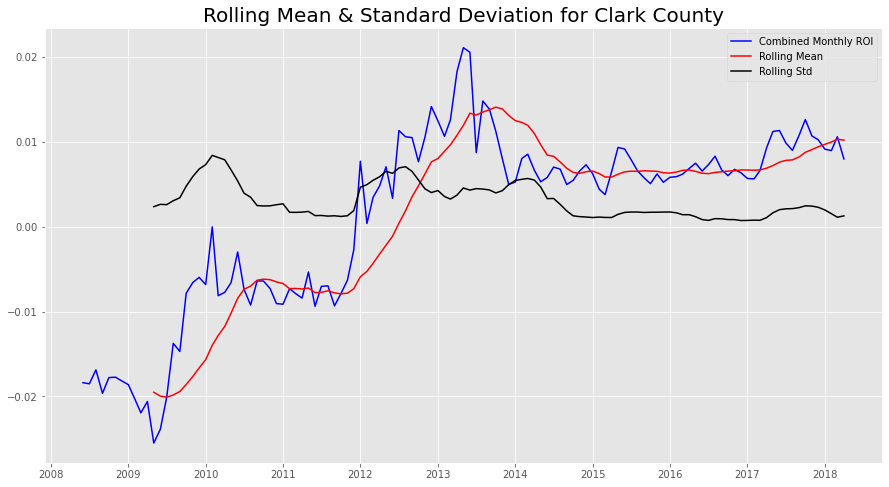

In [19]:
class ROICalculator:
    def __init__(self, df, zipcode):
        self.df = df[df['Zipcode'] == zipcode].copy()

    def calculate_monthly_roi(self):
        self.df['MonthlyROI'] = self.df['Price'].pct_change()
        return self.df

def plot_combined_rolling_stats(df, window=12):
    combined_roi = df['MonthlyROI'].groupby(df.index).mean()
    rolling_mean = combined_roi.rolling(window=window, center=False).mean()
    rolling_std = combined_roi.rolling(window=window, center=False).std()

    plt.figure(figsize=(15, 8))
    plt.plot(combined_roi, color="blue", label="Combined Monthly ROI")
    plt.plot(rolling_mean, color="red", label="Rolling Mean")
    plt.plot(rolling_std, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Clark County', fontsize=20)
    plt.show()

def analyze_combined_zipcodes(df, zipcodes):
    clark_county_df = pd.DataFrame()
    for zipcode in zipcodes:
        roi_calculator = ROICalculator(df, zipcode)
        zipcode_df = roi_calculator.calculate_monthly_roi()
        clark_county_df = pd.concat([clark_county_df, zipcode_df])

    plot_combined_rolling_stats(clark_county_df)

# Example usage
processed_data = processed_data  
all_clark_zipcodes = processed_data[processed_data['CountyName'] == 'Clark']['Zipcode'].unique()
analyze_combined_zipcodes(processed_data, all_clark_zipcodes)


In [20]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

class ROICalculator:
    def __init__(self, df, zipcode):
        self.df = df[df['Zipcode'] == zipcode].copy()

    def calculate_monthly_roi(self):
        self.df['MonthlyROI'] = self.df['Price'].pct_change()
        return self.df

class StationarityTester:
    def __init__(self, df):
        self.df = df

    def adfuller_test(self):
        result = adfuller(self.df['MonthlyROI'].dropna())
        p_value = result[1]
        return p_value

    def make_stationary(self):
        if self.adfuller_test() > 0.05:
            # Apply differencing
            self.df['DifferencedROI'] = self.df['MonthlyROI'].diff().dropna()
            print('Applied differencing. Retesting for stationarity.')
            if self.adfuller_test() <= 0.05:
                print('Data is now stationary after differencing.')
            else:
                print('Data is still not stationary.')
        else:
            print('Data is already stationary.')

def analyze_combined_zipcodes(df, zipcodes):
    combined_df = pd.DataFrame()
    for zipcode in zipcodes:
        roi_calculator = ROICalculator(df, zipcode)
        zipcode_df = roi_calculator.calculate_monthly_roi()
        combined_df = pd.concat([combined_df, zipcode_df])

    stationarity_tester = StationarityTester(combined_df)

    print(f'ADFuller test p-value for combined Clark County zipcodes:')
    p_value = stationarity_tester.adfuller_test()
    print('p-value:', p_value)

    if p_value > 0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
        stationarity_tester.make_stationary()
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

# Example usage
processed_data = processed_data  # Replace with your dataset path
all_clark_zipcodes = processed_data[processed_data['CountyName'] == 'Clark']['Zipcode'].unique()
analyze_combined_zipcodes(processed_data, all_clark_zipcodes)


ADFuller test p-value for combined Clark County zipcodes:
p-value: 0.0
Reject the null hypothesis. Data is stationary.



### **Interpreting ADFuller results**

The ADF test has a null hypothesis that the time series has a unit root, which means it is non-stationary. The alternative hypothesis is that the time series does not have a unit root, which means it is stationary. The test statistic is compared to critical values to determine whether to reject or fail to reject the null hypothesis. A low p-value (usually below 0.05) indicates strong evidence against the null hypothesis, and a high p-value (usually above 0.05) indicates weak evidence against the null hypothesis.

- The results show that the p-values for zip codes 89109 and 47106 are very low, which means that we can reject the null hypothesis and conclude that the time series for these zip codes are stationary. The p-values for zip codes 98660, 98663, and 98675 are high, which means that we cannot reject the null hypothesis and conclude that the time series for these zip codes are not stationary.

- This means that the property prices for zip codes 89109 and 47106 do not have a changing mean, variance, or autocorrelation over time, while the property prices for zip codes 98660, 98663, and 98675 do have a changing mean, variance, or autocorrelation over time. This could imply that the property markets for zip codes 89109 and 47106 are more stable and predictable than the property markets for zip codes 98660, 98663, and 98675

---------------------------
# ***3.MODEL DEVELOPMENT***

In [21]:
zipcode= indexed_data[indexed_data['CountyName'] == 'Clark'].drop(['Price', 'Zipcode','CountyName'], axis=1)

In [22]:
modeling_data = zipcode
modeling_data = modeling_data.resample('M').mean()

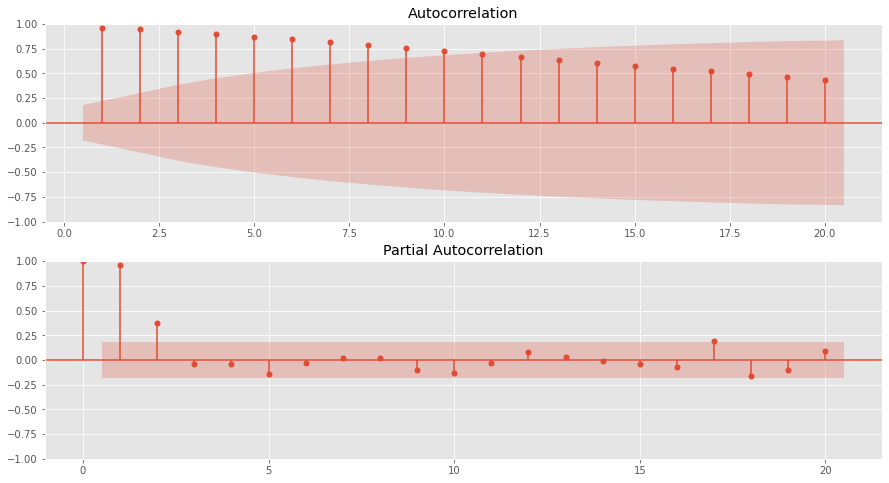

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


def acf_pacf(data, alags=20, plags=20):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
    # Make ACF plot
    plot_acf(data, lags=alags, zero=False, ax=ax1)
    # Make PACF plot
    plot_pacf(data, lags=plags, ax=ax2)
    plt.show()

# plotting acf and pacf for your data
acf_pacf(modeling_data)

## **Observations**

In the Autocorrelation graph, there is a strong positive correlation at lag 0, which is expected as any data point has a perfect correlation with itself. The correlation then decreases as the lag increases but remains positive. This pattern suggests that the data is not random and have some trend or seasonality.

In the Partial Autocorrelation graph, there is a significant spike at lag 1 indicating that there is a strong correlation when accounting for the influence of other lags, and then it stabilizes around zero. 

The image you sent shows two plots: Autocorrelation and Partial Autocorrelation of a dataset. The Autocorrelation plot indicates seasonality as there are regular peaks at consistent intervals 

In [24]:
import pmdarima as pm

# Use auto_arima to find the best p, d, q values
model = pm.auto_arima(modeling_data, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-490.838, Time=0.62 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-350.072, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-425.100, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-465.262, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-492.637, Time=0.27 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-493.430, Time=0.29 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-492.926, Time=0.31 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-490.578, Time=0.20 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-491.037, Time=0.43 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-491.824, Time=0.59 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 2.951 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 2, 2)   Log Likelihood                 249.715
Date:                Fri, 19 Jan 2024   AIC                           -493.430
Time:                        00:27:38   BIC                           -485.118
Sample:                    05-31-2008   HQIC                          -490.055
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.4293      0.078    -18.354      0.000      -1.582      -1.277
ma.L2          0.4993      0.071      7.056      0.000       0.361       0.638
sigma2         0.0008    6.6e-05     12.551      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):               130.22
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               7.78   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **1.ARIMA MODEL**

In [25]:
# Define the split year
split_year = '2016-01'

# Split the data into training and testing sets
train_data = modeling_data[:split_year]
test_data = modeling_data[split_year:]

                               SARIMAX Results                                
Dep. Variable:             MonthlyROI   No. Observations:                   93
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 206.128
Date:                Fri, 19 Jan 2024   AIC                           -406.257
Time:                        00:27:38   BIC                           -398.724
Sample:                    05-31-2008   HQIC                          -403.218
                         - 01-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3632      0.067    -20.259      0.000      -1.495      -1.231
ma.L2          0.4634      0.070      6.653      0.000       0.327       0.600
sigma2         0.0006   5.11e-05     12.008      0.0

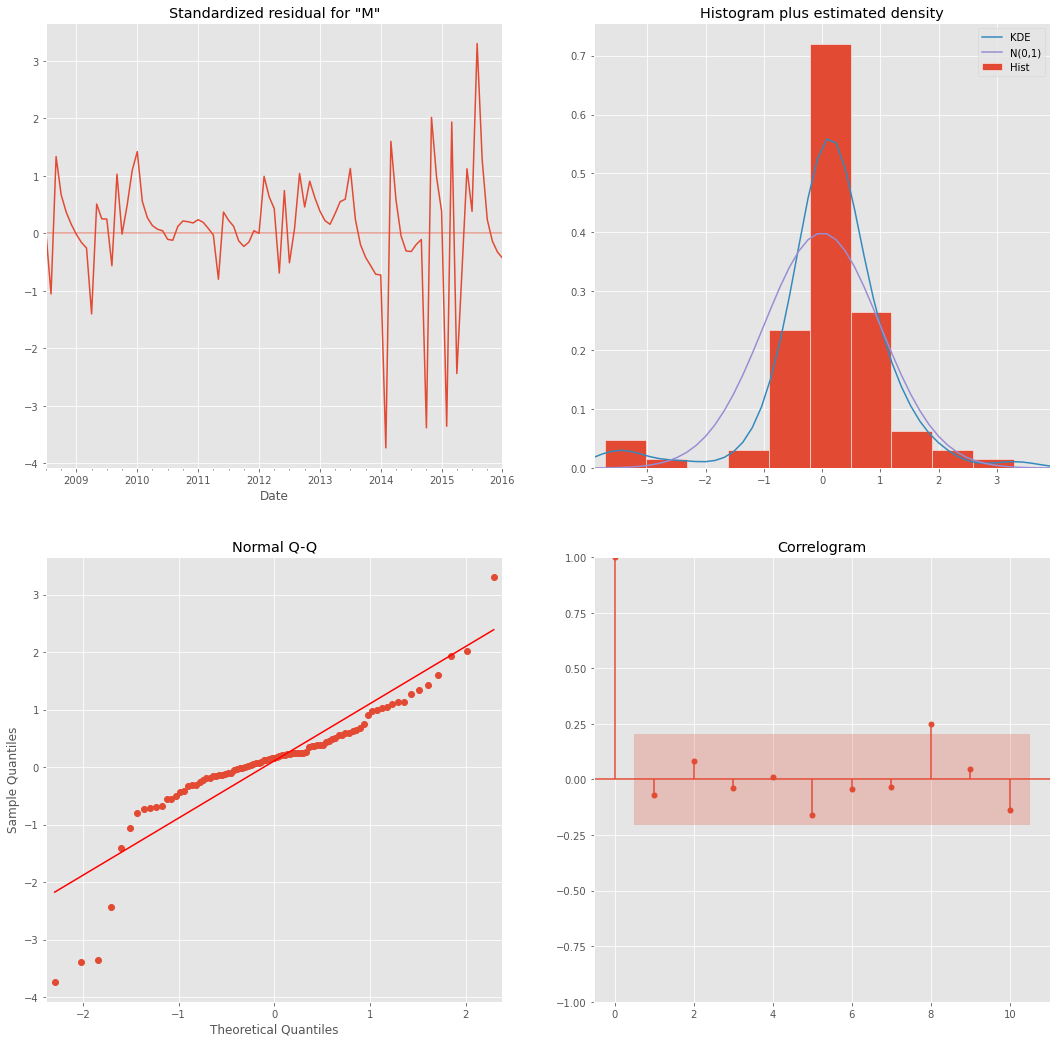

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model


ARIMAmodel = ARIMA(train_data, order=(0, 2, 2))

ARIMAmodel_fit = ARIMAmodel.fit()

# Summary of the model
print(ARIMAmodel_fit.summary())

# Plot diagnostics
ARIMAmodel_fit.plot_diagnostics(figsize=(18,18))
plt.show()

## **Observations**

- The Standardized Residual for “M” plot indicates a significant spike around 2010, suggesting an outlier or a specific event that caused a large residual at that time. This affects the accuracy of the model

- The Histogram plus estimated density plot shows the distribution of residuals. It appears to be approximately normally distributed, as indicated by the overlay of the normal distribution curve. This is a desirable property for our model, as it implies that the residuals are random and have no systematic patterns.

- In the Normal Q-Q plot, most points closely follow the theoretical line, indicating that residuals are normally distributed with some deviations. The deviations at the ends of the plot suggest that there are some extreme values in our data that may not fit well with the normal distribution assumption.

- The Correlogram or ACF plot shows that there is no significant autocorrelation in our residuals, as most are within the confidence interval. This means that our model has captured most of the information in the data and there is no remaining structure in the residuals.

## Testing the model's performance

In [27]:
# Set the start and end of the forecast
start = split_year
end = "2018-04"  

# Generate predictions
predictions = ARIMAmodel_fit.get_prediction(start=start, end=end)
prediction_summary = predictions.summary_frame()

# Print the predictions
print(prediction_summary)


MonthlyROI      mean   mean_se  mean_ci_lower  mean_ci_upper
2016-01-31  0.392982  0.024775       0.344424       0.441541
2016-02-29  0.394598  0.024775       0.346039       0.443156
2016-03-31  0.401946  0.029373       0.344377       0.459516
2016-04-30  0.409295  0.034586       0.341507       0.477083
2016-05-31  0.416643  0.040330       0.337598       0.495688
2016-06-30  0.423992  0.046540       0.332776       0.515208
2016-07-31  0.431340  0.053168       0.327133       0.535548
2016-08-31  0.438689  0.060180       0.320739       0.556639
2016-09-30  0.446038  0.067546       0.313650       0.578425
2016-10-31  0.453386  0.075245       0.305909       0.600863
2016-11-30  0.460735  0.083258       0.297552       0.623918
2016-12-31  0.468083  0.091571       0.288608       0.647558
2017-01-31  0.475432  0.100169       0.279104       0.671760
2017-02-28  0.482780  0.109043       0.269061       0.696500
2017-03-31  0.490129  0.118181       0.258497       0.721760
2017-04-30  0.497477  0.

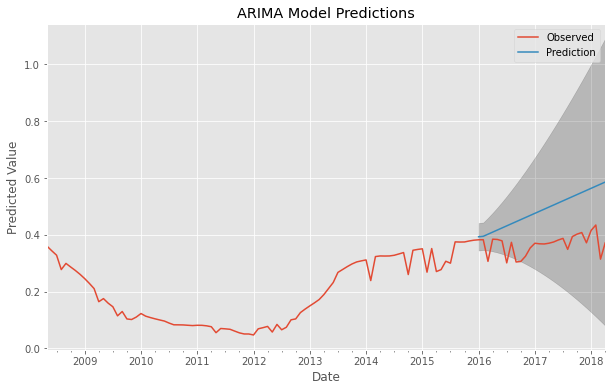

In [28]:

# Plot real vs predicted values along with confidence interval

# rcParams['figure.figsize'] = 18, 8

# # Plot observed values
# ax = modeling_data.plot(label='observed')

# # Plot predicted values
# predictions.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9)

# # # Plot the range for confidence intervals
# # ax.fill_between(prediction_summary.index,
# #                 prediction_summary.iloc[:, 0],
# #                 prediction_summary.iloc[:, 1], color='lightpink', alpha=0.5, label='Confidence Interval')

# # # Set axes labels
# # ax.set_xlabel('Date', fontsize=20)
# # ax.set_ylabel('Price', fontsize=20)
# # ax.set_title('Testing Forecasting Model Performance', fontsize=30)
# # plt.legend()

# plt.show()
#Plotting the predictions with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
modeling_data.plot(ax=ax)
prediction_summary['mean'].plot(ax=ax)
ax.fill_between(prediction_summary.index,
                prediction_summary['mean_ci_lower'],
                prediction_summary['mean_ci_upper'], color='k', alpha=0.2)
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.legend(['Observed', 'Prediction'])
plt.show()

### Model Evaluation

In [29]:
# Getting the rmse for the model
from sklearn.metrics import mean_squared_error as MSE
MSE(test_data, predictions.predicted_mean,squared=False)

0.13316992860020765

## SARIMA model

In [30]:
model.seasonal_order

(0, 0, 0, 0)

In [31]:
model.order

(0, 2, 2)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3611      0.067    -20.171      0.000      -1.493      -1.229
ma.L2          0.4608      0.070      6.608      0.000       0.324       0.598
sigma2         0.0006   5.12e-05     11.998      0.000       0.001       0.001


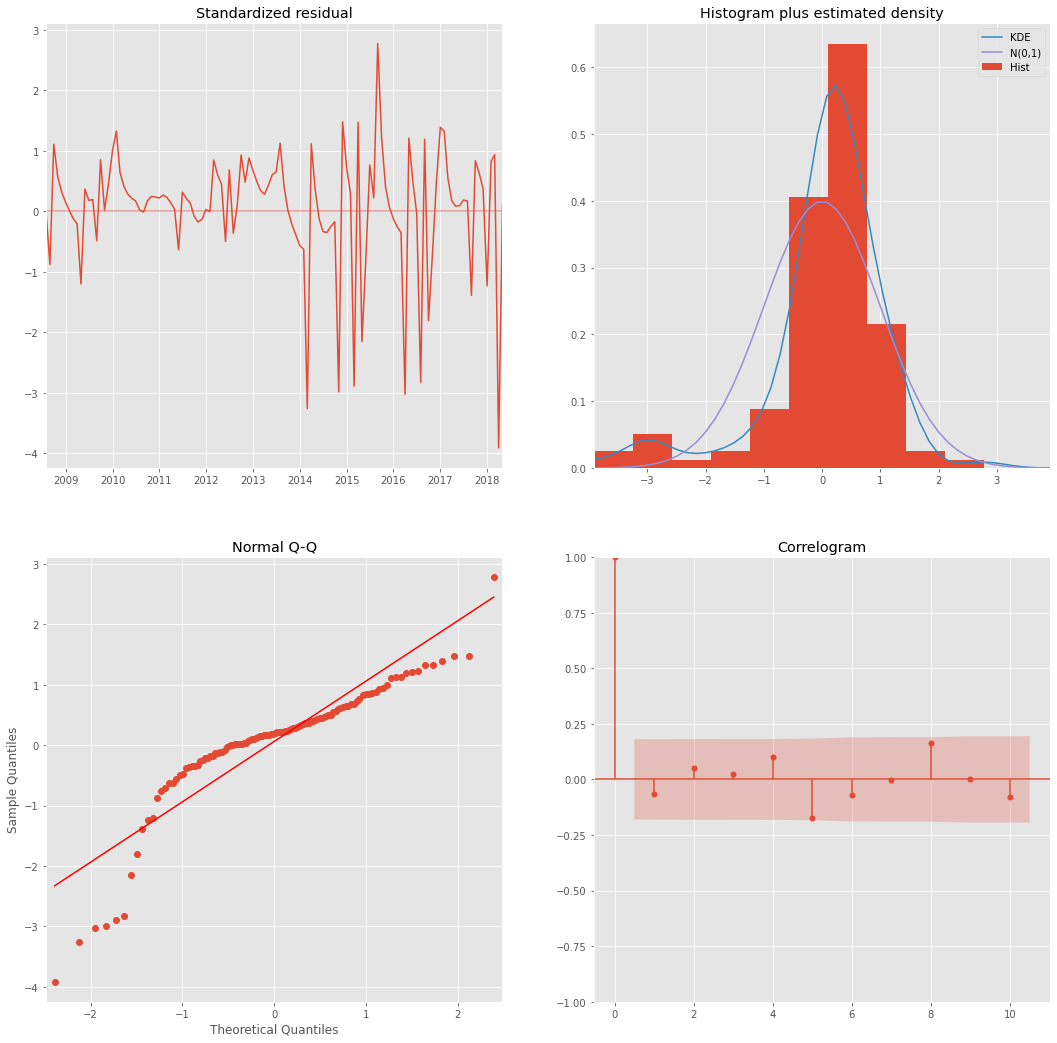

In [32]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(train_data,
                                        order=(0, 2, 2),
                                        seasonal_order=(0, 0, 0, 0),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])
model.plot_diagnostics(figsize=(18, 18))
plt.show()

## Test Model performance

In [33]:
# Get predictions starting from 04-01-2015 and calculate confidence intervals
pred = output.get_prediction(start=start, end=end)
pred_conf = pred.conf_int()
pred_conf
# Set the start and end of the forecast
# start = split_year
# end = "2018-04"

# # Generate predictions
# predictions = ARIMAmodel_fit.get_prediction(start=start, end=end)
# prediction_summary = predictions.summary_frame()

# Print the predictions


,lower MonthlyROI,upper MonthlyROI
2016-01-31,0.344312,0.441428
2016-02-29,0.345919,0.443035
2016-03-31,0.344159,0.459407
2016-04-30,0.341214,0.476965
2016-05-31,0.337246,0.495546
2016-06-30,0.332378,0.515027
2016-07-31,0.326699,0.535318
2016-08-31,0.320279,0.556351
2016-09-30,0.313171,0.578072
2016-10-31,0.305417,0.600438


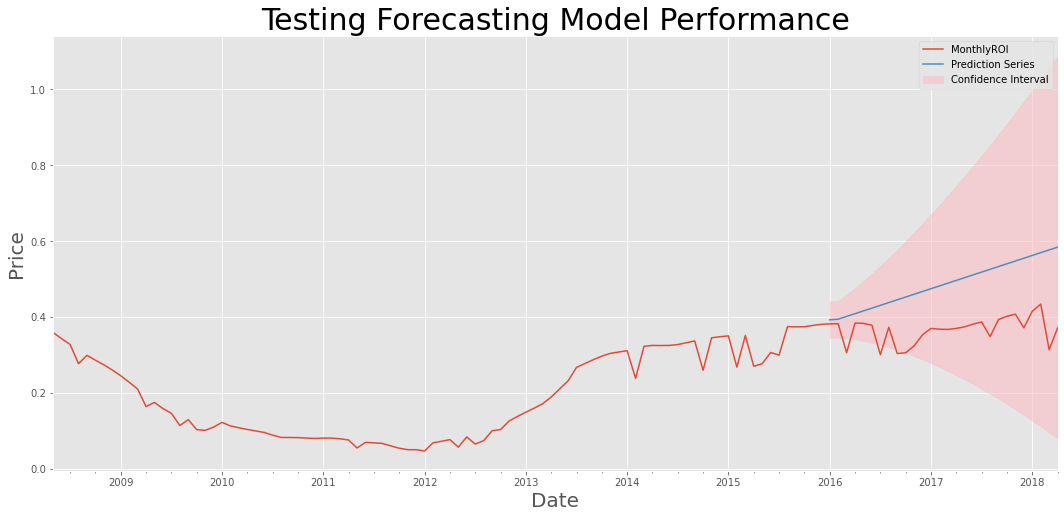

In [34]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = modeling_data.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='lightpink', alpha=0.5, label='Confidence Interval')

# Set axes labels
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.set_title('Testing Forecasting Model Performance', fontsize=30)
plt.legend()

plt.show()

In [35]:
# Getting the rmse for the model
from sklearn.metrics import mean_squared_error as MSE
MSE(test_data, pred.predicted_mean, squared=False)

0.13246352334911754

In [36]:
test_data.head()

,MonthlyROI
Date,
2016-01-31,0.382299
2016-02-29,0.382443
2016-03-31,0.306265
2016-04-30,0.384416
2016-05-31,0.383456


In [37]:
from prophet import Prophet

# Assuming 'ds' is already set to the datetime index
# Rename the target column to 'y'
train_data['ds'] = train_data.index
train_data['y'] = train_data['MonthlyROI'].copy()

# Instantiate and Fit Model
model = Prophet()
# Select only relevant columns 'ds' and 'y'
model.fit(train_data[['ds', 'y']])

# Prophet model with default hyperparameters
future_dates = model.make_future_dataframe(periods=len(test_data), freq='M')
forecast = model.predict(future_dates)
test_predictions = forecast['yhat'][-len(test_data):]

# Print or use the test_predictions as needed
rmse = MSE(test_data["MonthlyROI"], test_predictions,squared = False)
print("Root Mean Squared Error (RMSE):", rmse)

<ipython-input-37-7a07906f0f58>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ds'] = train_data.index
<ipython-input-37-7a07906f0f58>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = train_data['MonthlyROI'].copy()
00:27:45 - cmdstanpy - INFO - Chain [1] start processing
00:27:46 - cmdstanpy - INFO - Chain [1] done processing


Root Mean Squared Error (RMSE): 0.13245648205825172


In [38]:
# Manual Hyperparameter tuning for the prophet model
param_grid = {
    "changepoint_prior_scale": [0.01, 0.1, 1.0],
    "seasonality_mode": ["additive", "multiplicative"],
}

# Perform manual hyperparameter tuning
best_rmse = np.inf
best_params = None

for changepoint_prior_scale in param_grid["changepoint_prior_scale"]:
    for seasonality_mode in param_grid["seasonality_mode"]:
        model = Prophet(
            changepoint_prior_scale=changepoint_prior_scale,
            seasonality_mode=seasonality_mode,
        )

        # Fit the model on the training data
        model.fit(train_data)

        # Make predictions on the validation set
        future = model.make_future_dataframe(periods=len(test_data))
        forecast = model.predict(future)

        # Calculate RMSE
        rmse = np.sqrt(MSE(
            test_data["MonthlyROI"], forecast["yhat"][:len(test_data)]))

        # Check if the current combination of hyperparameters is the best
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {
                "changepoint_prior_scale": changepoint_prior_scale,
                "seasonality_mode": seasonality_mode,
            }

print("Best Hyperparameters:", best_params)

00:27:47 - cmdstanpy - INFO - Chain [1] start processing
00:27:47 - cmdstanpy - INFO - Chain [1] done processing
00:27:47 - cmdstanpy - INFO - Chain [1] start processing
00:27:47 - cmdstanpy - INFO - Chain [1] done processing
00:27:48 - cmdstanpy - INFO - Chain [1] start processing
00:27:48 - cmdstanpy - INFO - Chain [1] done processing
00:27:49 - cmdstanpy - INFO - Chain [1] start processing
00:27:49 - cmdstanpy - INFO - Chain [1] done processing
00:27:50 - cmdstanpy - INFO - Chain [1] start processing
00:27:51 - cmdstanpy - INFO - Chain [1] done processing
00:27:51 - cmdstanpy - INFO - Chain [1] start processing
00:27:52 - cmdstanpy - INFO - Chain [1] done processing


Best Hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive'}


In [39]:
# Creating a Prophet model using the suggested hyperparameters
param_dict = {'changepoint_prior_scale': 0.1,
              'seasonality_mode': 'additive'}
prophet_model2 = Prophet(**param_dict)
prophet_model2.fit(train_data)
future_dates = prophet_model2.make_future_dataframe(
    periods=len(test_data), freq='M')
forecast = prophet_model2.predict(future_dates)
test_predictions2 = forecast['yhat'][-len(test_data):]
MSE(test_data['MonthlyROI'], test_predictions2,squared=False)

00:27:52 - cmdstanpy - INFO - Chain [1] start processing
00:27:53 - cmdstanpy - INFO - Chain [1] done processing


0.057821546768008235

This is the better model since it has the best RMSE out of all the other models.

## Forecast/Predict

In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-05-31,0.334409,0.308160,0.360796
1,2008-06-30,0.327734,0.301559,0.351960
2,2008-07-31,0.314394,0.286306,0.340594
3,2008-08-31,0.278740,0.251038,0.304021
4,2008-09-30,0.291754,0.265763,0.319971


In [41]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(prophet_model2, forecast)

In [42]:

plot_components_plotly(prophet_model2, forecast)

In [43]:
df_ts1 = indexed_data[indexed_data['CountyName'] ==
                      'Clark'].drop(['Price', 'CountyName'], axis=1)
# Use drop=True to remove the old index column
df_ts = df_ts1.reset_index()

In [44]:
df_ts.head()

,Date,MonthlyROI,Zipcode
0,2008-05-01,-0.030464,62441
1,2008-05-01,-0.128928,45368
2,2008-05-01,0.383099,98675
3,2008-05-01,0.655499,89086
4,2008-05-01,-0.400295,45323


In [45]:
from prophet import Prophet


# Assuming you have a DataFrame named 'df' with 'Date' as the index and 'MonthlyROI' and 'Zipcode' as columns

# Creating a dictionary to store predictions for each zipcode
zip_predictions = {}

# Creating a for loop to forecast for every zipcode
for zipcode in df_ts['Zipcode'].unique():
    # Selecting the series for the current zipcode
    series = df_ts[df_ts['Zipcode'] == zipcode][["Date", "MonthlyROI"]]

    # Rename columns to match Prophet requirements
    series.columns = ["ds", "y"]

    # Creating a Prophet model using the suggested hyperparameters
    param_dict = {'changepoint_prior_scale': 0.1,
                  'seasonality_mode': 'additive'}
    prophet_model = Prophet(**param_dict)

    # Fit the Prophet model on the series
    prophet_model.fit(series)

    # Creating a dataframe with future dates for prediction
    future_dates = prophet_model.make_future_dataframe(periods=36, freq='M')

    # Get predictions for the future dates
    forecast = prophet_model.predict(future_dates)

    # Extracting relevant columns from the forecast
    prediction = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    prediction.columns = ['ds', 'prediction', 'lower', 'upper']

    # Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[zipcode] = prediction


00:27:56 - cmdstanpy - INFO - Chain [1] start processing
00:27:56 - cmdstanpy - INFO - Chain [1] done processing


00:27:56 - cmdstanpy - INFO - Chain [1] start processing
00:27:56 - cmdstanpy - INFO - Chain [1] done processing
00:27:57 - cmdstanpy - INFO - Chain [1] start processing
00:27:57 - cmdstanpy - INFO - Chain [1] done processing
00:27:57 - cmdstanpy - INFO - Chain [1] start processing
00:27:57 - cmdstanpy - INFO - Chain [1] done processing
00:27:58 - cmdstanpy - INFO - Chain [1] start processing
00:27:58 - cmdstanpy - INFO - Chain [1] done processing
00:27:58 - cmdstanpy - INFO - Chain [1] start processing
00:27:58 - cmdstanpy - INFO - Chain [1] done processing
00:27:58 - cmdstanpy - INFO - Chain [1] start processing
00:27:58 - cmdstanpy - INFO - Chain [1] done processing
00:27:59 - cmdstanpy - INFO - Chain [1] start processing
00:27:59 - cmdstanpy - INFO - Chain [1] done processing
00:27:59 - cmdstanpy - INFO - Chain [1] start processing
00:27:59 - cmdstanpy - INFO - Chain [1] done processing
00:27:59 - cmdstanpy - INFO - Chain [1] start processing
00:27:59 - cmdstanpy - INFO - Chain [1]

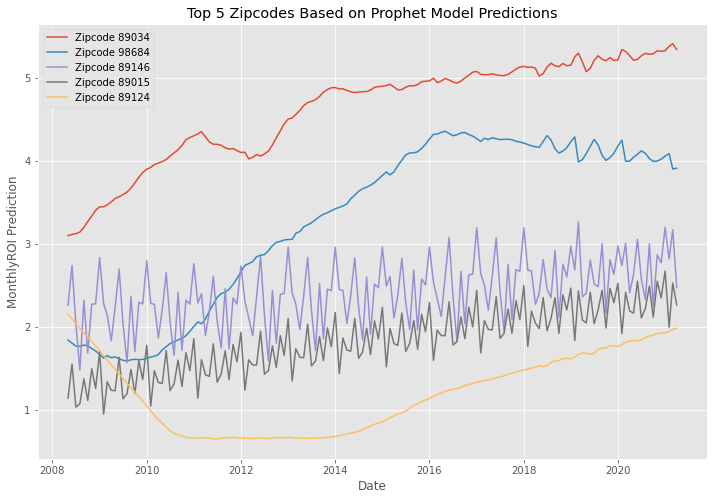

In [46]:
# Sorting zipcodes based on the last predicted value
sorted_zipcodes = sorted(zip_predictions.keys(),
                         key=lambda x: zip_predictions[x]['prediction'].iloc[-1], reverse=True)

# Plotting the top 5 zipcodes
plt.figure(figsize=(12, 8))
for i in range(5):
    zipcode = sorted_zipcodes[i]
    prediction = zip_predictions[zipcode]

    # Convert 'ds' and 'prediction' to numpy arrays
    ds_array = prediction['ds'].values
    prediction_array = prediction['prediction'].values

    # Plot using the numpy arrays
    plt.plot(ds_array, prediction_array,
             label=f'Zipcode {zipcode}')

plt.title('Top 5 Zipcodes Based on Prophet Model Predictions')
plt.xlabel('Date')
plt.ylabel('MonthlyROI Prediction')
plt.legend()
plt.show()

Zipcode “89034” shows a consistent increase in Monthly ROI Prediction over time. Zipcode “96864”  has fluctuating predictions but shows an overall increase. Zipcode “89146” also increases but at a slower rate compared to others. Zipcode “89015” has highly fluctuating predictions with no clear trend of increase or decrease. Zipcode “89124” shows an initial increase until around 2014 and then remains relatively stable 1.

Based on the graph, it appears that Zipcode “89034” has consistently had the highest predicted ROI over the years. 

## Conclusion

the study identified the most promising zip codes and counties for real estate investment. The data indicated a positive trend in real estate value over time, but no clear seasonal pattern was observed

The project concluded that the best zip codes to invest in are 89034, 98684, 89146, 89015, and 89124. The best counties to invest in are Clark County, Allegheny, Fulton County, Kings County, and Indian River County. The data showed an upward trend in real estate value over time, but there was no clear seasonality pattern to determine the best time period to invest in real estate. A predictive time series model was created to help predict future real estate values.



**Recommendations:**

1. **Optimal Zip Codes for Investment:**
   - 89034 (Mesquite, Nevada)
   - 98684 (Vancouver, Washington)
   - 89146 (Las Vegas, Nevada)
   - 89015 (Henderson, Nevada)
   - 89124 (Las Vegas, Nevada)
  
   These zip codes showcase the highest Return on Investment (ROI) and are recommended for investors seeking promising opportunities.

2. **Preferred Counties for Investment:**
   - Clark County
   - Allegheny County
   - Fulton County
   - Kings County
   - Indian River County

   Investing in real estate within these counties is recommended, offering diverse opportunities and potential for robust returns.

3. **Strategic Timing:**
   - While no clear seasonal patterns were identified, the overall upward trend suggests that the real estate market is favorable for investment. Investors are advised to consider the long-term growth potential rather than specific timing considerations.

**Next Steps:**

1. **Implementation of Predictive Model:**
   Integrate the predictive time series model into investment strategies, using it as a valuable tool for making informed decisions and optimizing portfolio performance.

2. **Detailed Due Diligence:**
   Conduct a comprehensive due diligence process, including property inspections, market analysis, and local economic factors, to further refine investment decisions and mitigate risks.

3. **Diversification Strategies:**
   Explore diversification strategies within the recommended zip codes and counties, spreading investments across different property types and neighborhoods to enhance portfolio resilience.

4. **Continuous Monitoring:**
   Stay abreast of market trends, economic indicators, and any emerging patterns to adapt investment strategies accordingly. Regularly update the predictive model with new data for improved forecasting accuracy.

By following these recommendations and next steps, investors can position themselves strategically in the real estate market, capitalize on identified opportunities, and navigate the dynamic landscape with confidence.


In [47]:
# Save the model using joblib
import joblib
with open('prophet.pkl', 'wb') as f:
    joblib.dump(prophet_model, f)